<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Health Insurance Data)

The dataset contains information about 1300 individuals regarding insurance charges. The data contains an individual's basic information like age, sex, bmi, the region of residence and so on. 

Attribute Information:

**age**: Age of the individual

**gender**: Gender of the individual

**bmi**: Body mass index of the individual

**bp**: Systolic blood pressure in mm/hg

**children**: Number of children of the individual

**smoker**: Individual is smoker or not

**region**: Individual's region of residence

**medical_cost**: Individual's medical costs billed by the insurance company

##  Table of Content

1. **[Univariate Analysis](#uni)**
2. **[Multivariate Analysis](#multi)**
3. **[Handle Non-Numeric Data](#cat)**
4. **[Normalization](#norm)**
5. **[Transformation Techniques](#trans)**

**Import the required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('health_insurance.csv')
df.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520


#### Load the health insurance dataset and check the first five observations

In [1]:
df.head()

### Let's begin with some hands-on practice exercises

<a id="uni"> </a>
## 1. Univariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any extreme observations present in 'bmi'? Support your answer with a plot
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

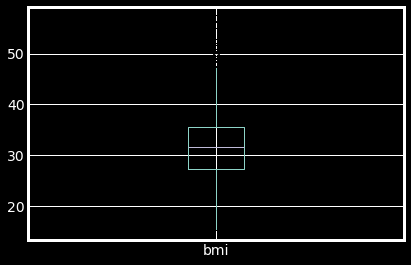

In [13]:
df['bmi'].plot(kind= 'box')
plt.style.use('fivethirtyeight')
plt.show()

As we can see in boxplot, we do have outliers- represented by dots in the top
A point is considered outlier if its 1.5 times IQR away either from 1st or 3rd quantile. 

Lets find out Q1, Q3 quantile, find IQR and check whether there are any outliers or not.

In [ ]:
q1= df['bmi'].quantile(0.25)
q3= df['bmi'].quantile(0.75)
iqr = q3-q1
ub = q3+iqr
lb = q1-iqr

In [15]:
len([i for i in df['bmi'] if i<lb or i>ub])

68

We have 68 outliers in the data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is the variable 'age' skewed? Support your answer with a plot and metric</b>
                </font>
            </div>
        </td>
    </tr>
</table>

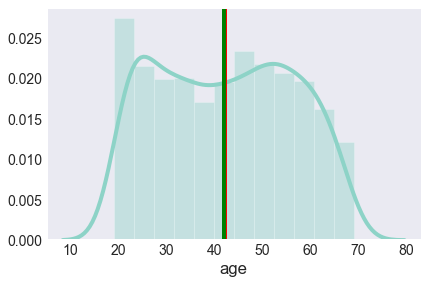

In [26]:
sns.distplot(df['age'])
plt.axvline(x=df['age'].mean(), color= 'r')
plt.axvline(x=df['age'].median(), color= 'g')
sns.set_style('dark')
plt.show()

In [29]:
e= pd.cut(df['age'], 8)
e.value_counts()

(18.95, 25.25]    213
(50.25, 56.5]     177
(37.75, 44.0]     175
(25.25, 31.5]     161
(44.0, 50.25]     159
(56.5, 62.75]     156
(31.5, 37.75]     154
(62.75, 69.0]     105
Name: age, dtype: int64

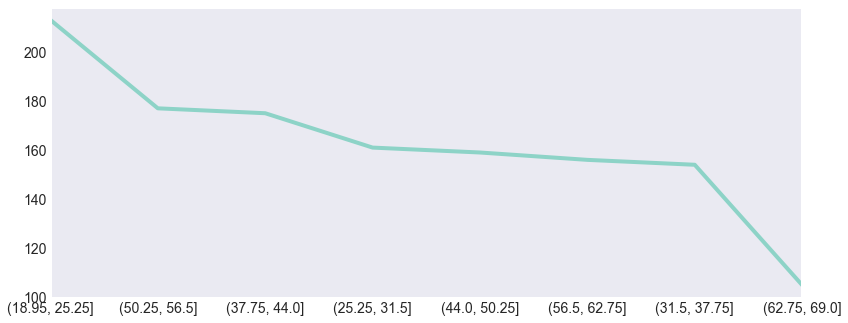

In [44]:
e.value_counts().plot(figsize=(12,5))

YES, age is skewed. to the left.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the probability that the individuals have charged less than 25k for medical treatment? Support your answer with the plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

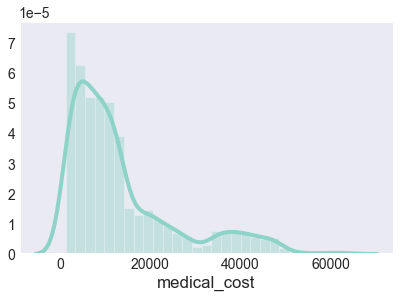

In [49]:
sns.distplot(df['medical_cost'])

In [56]:
len(df.loc[df['medical_cost']<25000])/len(df['medical_cost'])

0.8523076923076923

There is a probability of 85% that individuals spend less than 25K in insurance

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Draw the line for mean and median on the distribution plot and identify the type of skewness for BMI</b>
                </font>
            </div>
        </td>
    </tr>
</table>

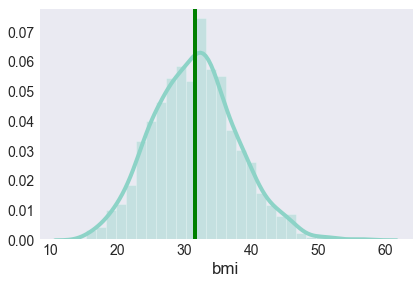

In [57]:
sns.distplot(df['bmi'])
plt.axvline(x=df['bmi'].mean(), color= 'r')
plt.axvline(x=df['bmi'].median(), color= 'g')
sns.set_style('dark')
plt.show()

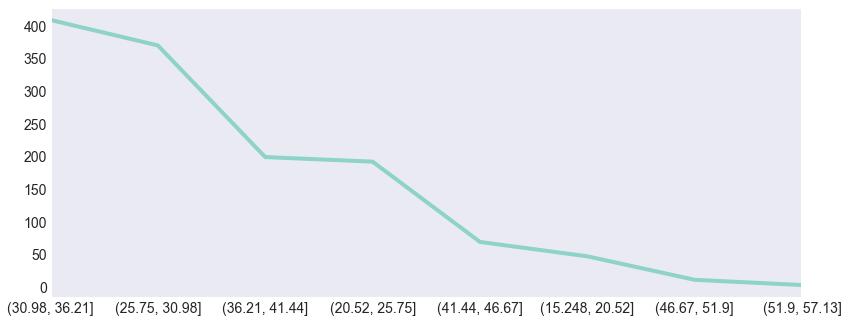

In [58]:
f= pd.cut(df['bmi'], 8)
f.value_counts().plot(figsize=(12,5))

it is left skewed. BMI

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the distribution of medical cost using violin plot and describe its distribution</b>
                </font>
            </div>
        </td>
    </tr>
</table>

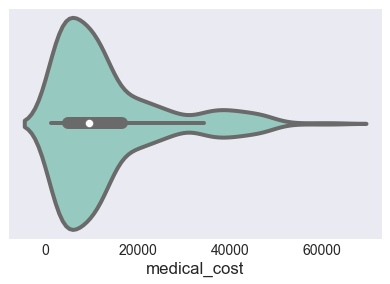

In [61]:
sns.violinplot(df['medical_cost'])

Here, we can see that the range between 0 and 20,000 has the fatter body- which means most number of 
observations are in that range only.
there are obvious outliers too beyond 50000. 


<a id="multi"> </a>
## 2. Multivariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Is there any individual with age less than 30 and meadical cost greater than 40k?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [66]:
#yes
df.loc[(df['age']<30) & (df['medical_cost']>= 40000)]

,age,gender,bmi,bp,children,region,smoker,medical_cost
254,26,F,47.54,156,2,northeast,smoker,42112.2356
1009,25,F,55.58,152,1,northeast,smoker,44501.3982
1086,26,M,41.75,152,1,northeast,smoker,40904.1995


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Does the scatter plot of BMI and medical cost reveal potential outliers?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

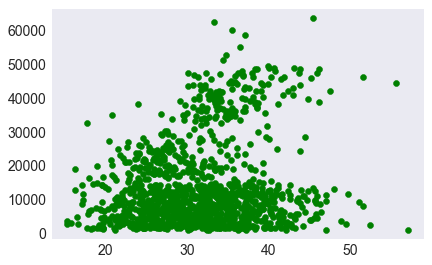

In [71]:
# Not cleanly, but it does.
plt.scatter(x=df['bmi'], y=df['medical_cost'], color='g')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Determine the percentage variation in BMI for males and females

</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [79]:
aa= pd.DataFrame(df['bmi'].groupby(df['gender']).var())

In [81]:
aa['perc'] = aa['bmi']/aa['bmi'].sum()

In [82]:
aa

,bmi,perc
gender,,
F,41.003509,0.507872
M,39.732451,0.492128


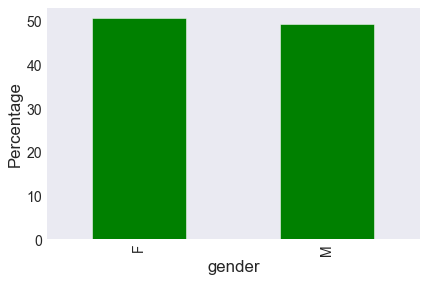

In [86]:
(aa['perc']*100).plot(kind='bar', color='g')
plt.ylabel('Percentage')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Which region has the highest number of males?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

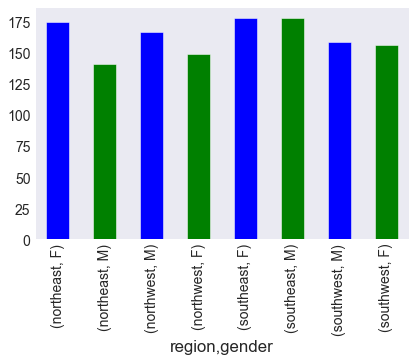

In [97]:
df['gender'].groupby(df['region']).value_counts().plot(kind='bar', color= ['b', 'g'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Analyze the pairwise relationship between the numeric variables
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

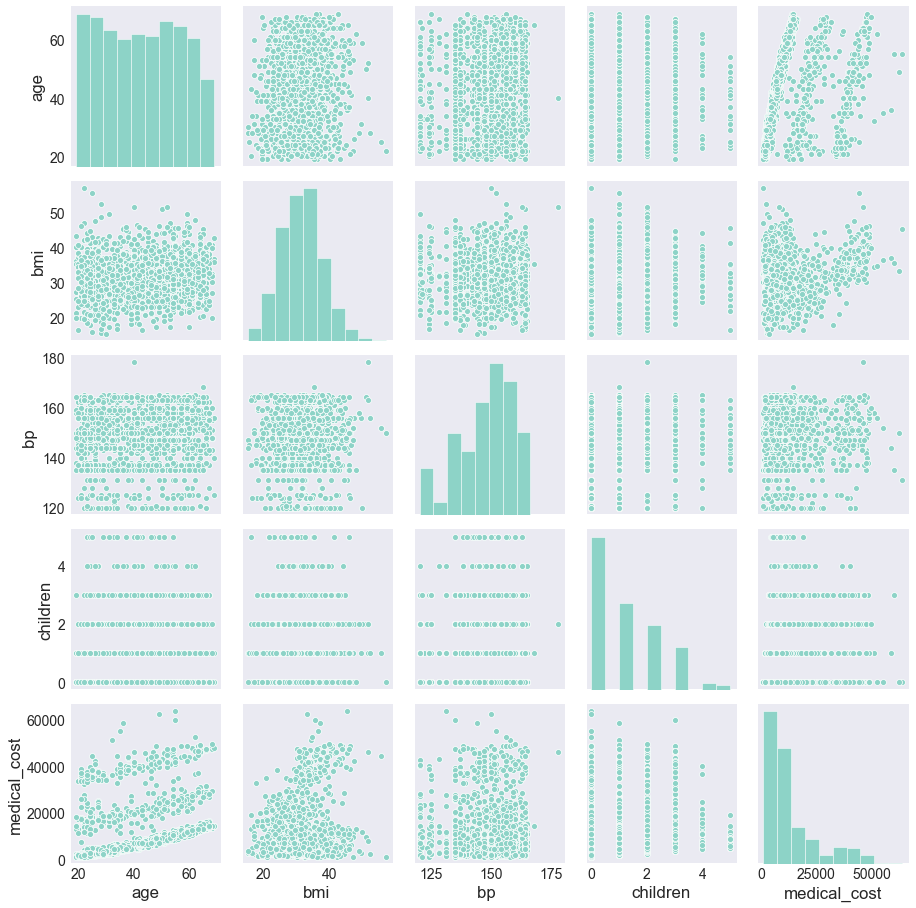

In [109]:
sns.pairplot(df.select_dtypes(include=['number']))

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Are the medical costs affected by an individual's smoking habits?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [123]:
# Yes it surely is. 

df['medical_cost'].groupby([df['smoker'], df['gender']]).mean()

smoker      gender
non-smoker  F          8091.795039
            M          8783.012143
smoker      F         32824.092529
            M         30845.700025
Name: medical_cost, dtype: float64

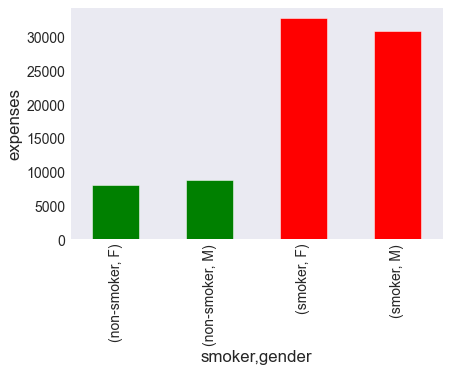

In [127]:
df['medical_cost'].groupby([df['smoker'], df['gender']]).mean().plot(kind='bar', color=['g', 'g', 'r', 'r'])
plt.ylabel('expenses')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Check if the region of residence and age of the individuals have an impact on the medical cost? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

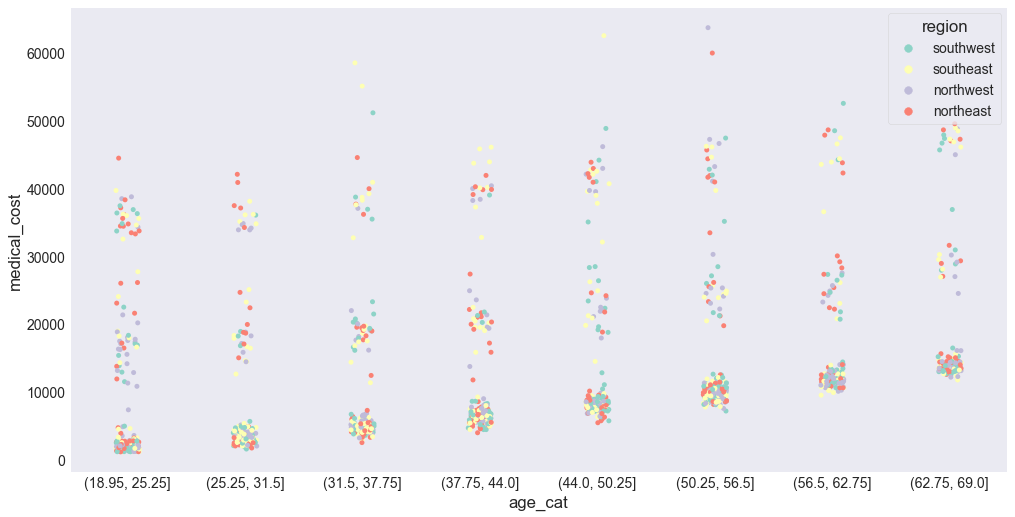

In [139]:
df['age_cat']= pd.cut(df['age'],8)
fig, axes = plt.subplots(figsize=(15,8))
sns.stripplot(x='age_cat', y='medical_cost', hue='region', data=df, ax=axes)

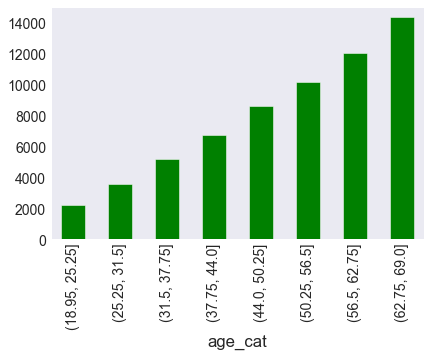

In [152]:
df['medical_cost'].groupby(df['age_cat']).median().plot(kind='bar', color='g')

As the age increases, medical cost increse too

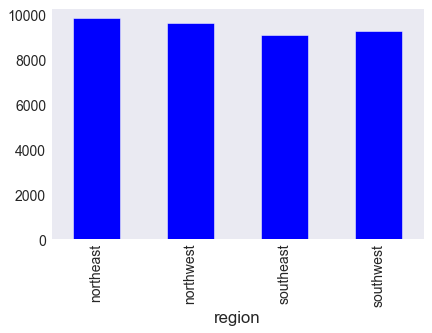

In [151]:
df['medical_cost'].groupby(df['region']).median().plot(kind='bar', color='b')

with region, a very slight increse in north east and north west region could be seen

<a id="cat"> </a>
## 3. Handle Non-Numeric Data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Create a dummy variable for each category in 'region' 
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [159]:
df = pd.concat((pd.get_dummies(df['region']), df), axis=1)

In [160]:
df.head()

,northeast,northwest,southeast,southwest,age,gender,bmi,bp,children,region,smoker,medical_cost,age_cat
0,0,0,0,1,23,M,31.900,157,0,southwest,smoker,16884.92400,"(18.95, 25.25]"
1,0,0,1,0,20,F,36.770,160,1,southeast,non-smoker,1725.55230,"(18.95, 25.25]"
2,0,0,1,0,33,F,35.000,145,3,southeast,non-smoker,4449.46200,"(31.5, 37.75]"
3,0,1,0,0,37,F,23.705,153,0,northwest,non-smoker,21984.47061,"(31.5, 37.75]"
4,0,1,0,0,36,F,27.880,156,0,northwest,non-smoker,3866.85520,"(31.5, 37.75]"


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Create a variable 'smoker_label' containing unique label for each category in the variable 'smoker'
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [161]:
df['smoker_label'] = df['smoker'].map({'smoker':1, 'non-smoker':0})

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Create a variable which will contain the frequency of an individual's gender</b>
                </font>
            </div>
        </td>
    </tr>
</table>

,northeast,northwest,southeast,southwest,age,gender,bmi,bp,children,region,smoker,medical_cost,age_cat,smoker_label,sex,log_medical_cost,trans_age,encoded_sex
0,0,0,0,1,23,M,31.900,157,0,southwest,smoker,16884.92400,"(18.95, 25.25]",1,NaN,9.734176,0.08,0.494615
1,0,0,1,0,20,F,36.770,160,1,southeast,non-smoker,1725.55230,"(18.95, 25.25]",0,NaN,7.453302,0.02,0.505385
2,0,0,1,0,33,F,35.000,145,3,southeast,non-smoker,4449.46200,"(31.5, 37.75]",0,NaN,8.400538,0.28,0.505385
3,0,1,0,0,37,F,23.705,153,0,northwest,non-smoker,21984.47061,"(31.5, 37.75]",0,NaN,9.998092,0.36,0.505385
4,0,1,0,0,36,F,27.880,156,0,northwest,non-smoker,3866.85520,"(31.5, 37.75]",0,NaN,8.260197,0.34,0.505385
5,0,0,1,0,33,M,25.740,152,0,southeast,non-smoker,3756.62160,"(31.5, 37.75]",0,NaN,8.231275,0.28,0.494615
6,0,0,1,0,48,M,31.440,150,1,southeast,non-smoker,8240.58960,"(44.0, 50.25]",0,NaN,9.016827,0.58,0.494615
7,0,1,0,0,26,F,21.845,140,0,northwest,non-smoker,2395.17155,"(25.25, 31.5]",0,NaN,7.781210,0.14,0.505385
8,1,0,0,0,36,M,31.920,137,1,northeast,smoker,37701.87680,"(31.5, 37.75]",1,NaN,10.537465,0.34,0.494615
9,0,1,0,0,60,M,27.720,142,3,northwest,non-smoker,14001.13380,"(56.5, 62.75]",0,NaN,9.546894,0.82,0.494615


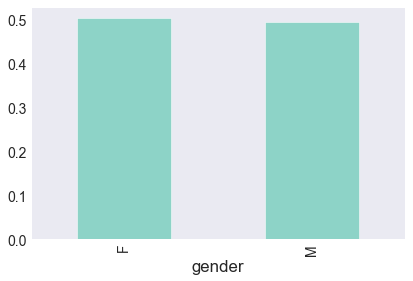

In [198]:
fq = df.groupby('gender').size()/len(df)
fq
df.loc[:, 'encoded_sex'] = df['gender'].map(fq)    
fq.plot.bar(stacked = True)   
df.head(10)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Create a variable such that the value '1' indicates that the individual is a smoker and '0' indicates a non-smoker</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
df['smoker_label'] = df['smoker'].map({'smoker':1, 'non-smoker':0})

<a id="norm"> </a>
## 4. Normalization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Transform BMI such that it will have mean zero and variance one</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [196]:
# standard sclaer
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df[['bmi']])
print(scaled)

[[ 0.05014192]
 [ 0.8165832 ]
 [ 0.53802035]
 ...
 [ 0.51441333]
 [-1.06725708]
 [ 0.23427668]]


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Check the range of 'age' and transform the values such that the range will be 1</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [180]:
# Min max scaler


In [193]:
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df[['age']])
print(scaled.flatten())

[0.08 0.02 0.28 ... 0.04 0.06 0.88]


In [194]:
df['trans_age']= scaled.flatten()
df.head()

,northeast,northwest,southeast,southwest,age,gender,bmi,bp,children,region,smoker,medical_cost,age_cat,smoker_label,sex,log_medical_cost,trans_age
0,0,0,0,1,23,M,31.900,157,0,southwest,smoker,16884.92400,"(18.95, 25.25]",1,NaN,9.734176,0.08
1,0,0,1,0,20,F,36.770,160,1,southeast,non-smoker,1725.55230,"(18.95, 25.25]",0,NaN,7.453302,0.02
2,0,0,1,0,33,F,35.000,145,3,southeast,non-smoker,4449.46200,"(31.5, 37.75]",0,NaN,8.400538,0.28
3,0,1,0,0,37,F,23.705,153,0,northwest,non-smoker,21984.47061,"(31.5, 37.75]",0,NaN,9.998092,0.36
4,0,1,0,0,36,F,27.880,156,0,northwest,non-smoker,3866.85520,"(31.5, 37.75]",0,NaN,8.260197,0.34


<a id="trans"> </a>
## 5. Transformation Techniques

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Check the skewness for 'medical_cost'. If the data is skewed, then use the appropriate technique to reduce the skewness in the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [165]:
# we can use a log_transform for handling skewed data
df['log_medical_cost'] = np.log(df['medical_cost'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Transform the 'log_medical_cost' values to the original scale and compare the 'medical_cost' and the transformed data</b>
                </font>
            </div>

</td>
    </tr>
</table>

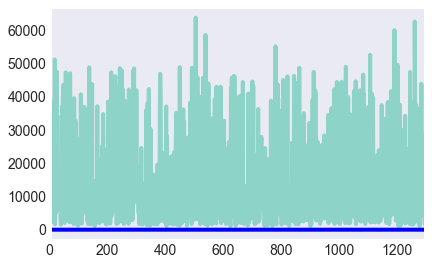

In [170]:
df['medical_cost'].plot()
df['log_medical_cost'].plot(color='b')